# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

8987551792.261171


Text(0, 0.5, 'Newtons/Couloumb')

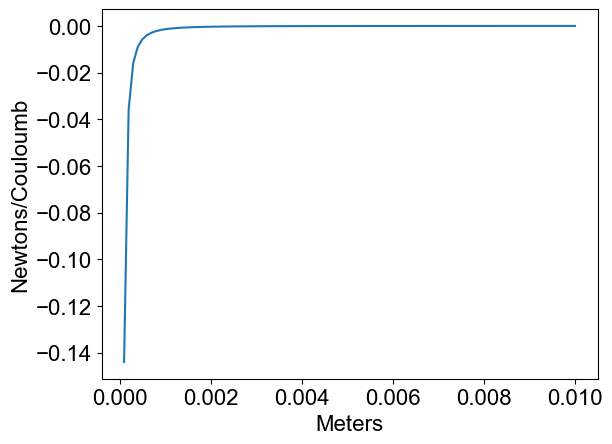

In [9]:
E=1/(4*np.pi*constants.epsilon_0)
#constants.numbername will give the necessary special character
print(E)
E_field = lambda q, r: E * q / r**2
#Not sure yet what the lambda function does, but I get the results of it.
#uses Equation 2 as a function of how far away the point charge is from the reference frame. q serves as the y-axis and distance is the x-axis.
radii = np.linspace(0.0001, 0.01, num=100, endpoint=True)
#linspace creates an evenly spaced-out range of numbers with an endpoint at 0.01, startin from 0.0001
plt.plot(radii, E_field(-constants.e, radii))
plt.xlabel("Meters")
plt.ylabel("Newtons/Couloumb")

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

"\nf increases gradually from 0 to 1 wiwth the linspace command, it is then multiplied\nby the speed of light to create the graph seen below.\nBasically, according to the incorrect conception of light, the speed of light itself\ncould 'slow down' as the speed of the reference frame increases.\n"

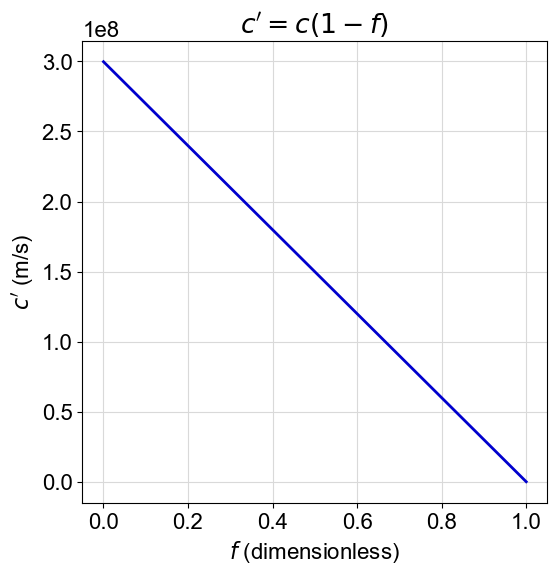

In [13]:
cprime = lambda f: constants.c * (1-f)
f = np.linspace(0, 1, num=101, endpoint=True)
plt.figure(figsize=(6,6))
plt.plot(f, cprime(f), color='mediumblue', linewidth=2)
plt.grid(color='0.85')
plt.xlabel(r"$f$ (dimensionless)")
plt.ylabel(r"$c^{\prime}$ (m/s)")
plt.title(r"$c^{\prime} = c(1-f)$")
"""
f increases gradually from 0 to 1 wiwth the linspace command, it is then multiplied
by the speed of light to create the graph seen below.
Basically, according to the incorrect conception of light, the speed of light itself
could 'slow down' as the speed of the reference frame increases.
"""

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

C:\Users\charl\AppData\Local\Temp\ipykernel_30028\1572928529.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1 / (constants.mu_0 * cprime**2)


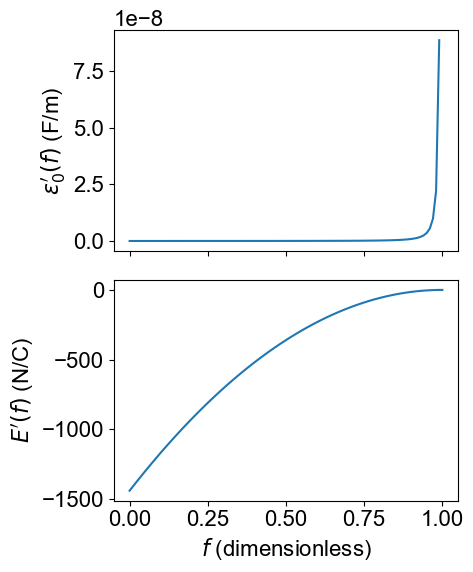

In [16]:
def epsilon_0_prime(cprime):
    return 1 / (constants.mu_0 * cprime**2)

eps_0_prime = epsilon_0_prime(cprime(f))

micron = 1e-6
E_field_prime = -constants.e / (4 * np.pi * eps_0_prime * micron**2)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,6))

ax1.plot(f, eps_0_prime)
ax1.set_ylabel(r"$\epsilon_0^{\prime}(f)$ (F/m)")
ax2.plot(f, E_field_prime)
ax2.set_ylabel(r"$E^{\prime}(f)$ (N/C)")
ax2.set_xlabel(r"$f$ (dimensionless)")
fig.tight_layout()

#This starts out by defining a function that takes the same range of cprime as used previously and returns 1 over that value squared multiplied by mu naught
#this is used to calculate the chagning value of epsilon naught, which is graphed below along with the respective electric field as that changes.

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

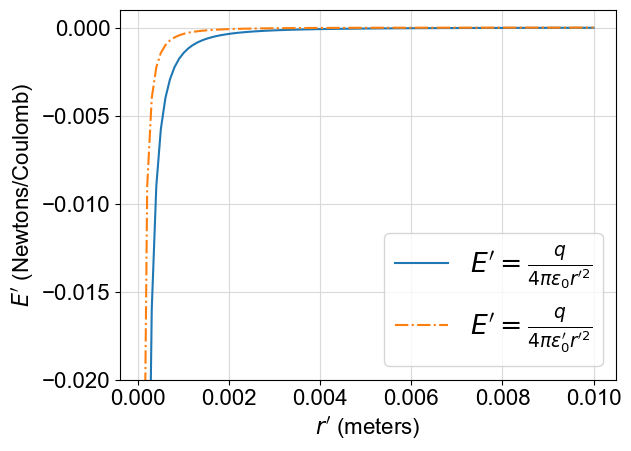

In [17]:
eps_0_f05 = epsilon_0_prime(cprime(0.5))
E_f05 = -constants.e / (4 * np.pi * eps_0_f05 * radii**2)

plt.plot(radii, E_field(-constants.e, radii), 
         label=r"$E^{\prime} = \frac{q}{4 \pi \epsilon_0 r^{\prime 2}}$")
plt.plot(radii, E_f05, linestyle='-.',
         label=r"$E^{\prime} = \frac{q}{4 \pi \epsilon_0^{\prime} r^{\prime 2}}$")
plt.xlabel(r"$r^{\prime}$ (meters)")
plt.ylabel(r"$E^{\prime}$ (Newtons/Coulomb)")
plt.ylim([-0.02, 0.001])
plt.legend(loc='best', fontsize='large')
plt.grid(color='0.85')

#The code here is very similar to the last entries
#There is a mismatch in the graphs here. 
#The dotted line shows the prime epsilon naught in the field equation, while the solid line shows the original. 

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

C:\Users\charl\AppData\Local\Temp\ipykernel_30028\313743464.py:1: RuntimeWarning: divide by zero encountered in divide
  mu_0_prime = 1 / (constants.epsilon_0 * cprime(f)**2)


(0.0, 0.004)

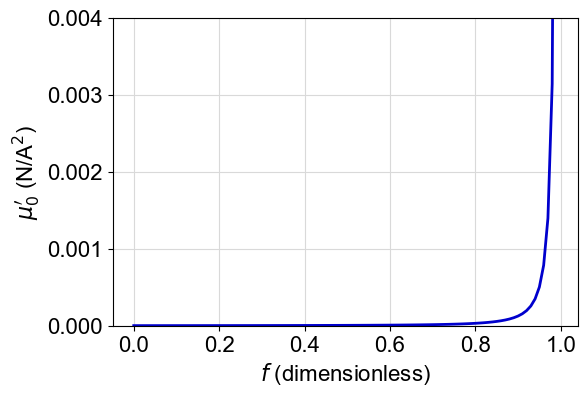

In [19]:
mu_0_prime = 1 / (constants.epsilon_0 * cprime(f)**2)
plt.figure(figsize=(6,4))
plt.plot(f, mu_0_prime, color='mediumblue', linewidth=2)
plt.grid(color='0.85')
plt.xlabel(r"$f$ (dimensionless)")
plt.ylabel(r"$\mu_0^{\prime}$ (N/A$^2$)")
plt.ylim([0,0.004])


#Essentially the same thing as in problem 3, except this time mu naught is changing, with f, instead of epsilon naught.

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

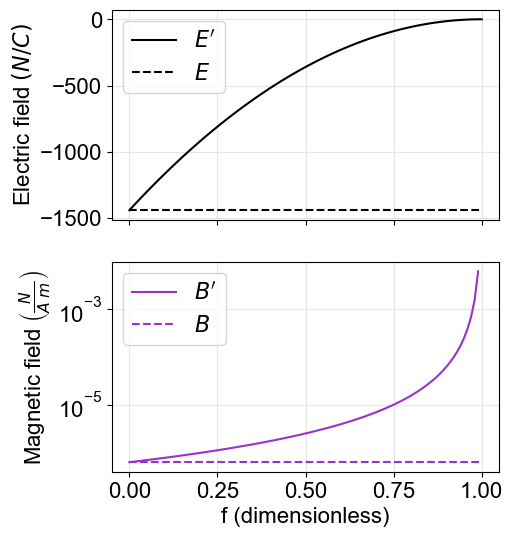

In [20]:
E_field_correct = -constants.e / (4 * np.pi * constants.epsilon_0 * micron**2)
B_field_correct = constants.mu_0 / 2 # equal to mu_0 I / (2 R) with R = 1 m, I = 1 A
B_field_prime = mu_0_prime / 2 # Same as above, except that mu_0' depends on f

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,6))

ax1.plot(f, E_field_prime, label=r"$E^{\prime}$", color='k')
ax1.plot(f, E_field_correct*np.ones(len(f)), label=r"$E$", color='k', ls='--')
ax1.set_ylabel(r"Electric field $(N/C)$")
ax1.legend(loc='upper left')
ax1.grid(color='0.9')

ax2.semilogy(f, B_field_prime, label=r"$B^{\prime}$", color='darkorchid')
ax2.semilogy(f, B_field_correct*np.ones(len(f)), label=r"$B$", color='darkorchid', ls='--')
ax2.set_ylabel(r"Magnetic field $\left( \frac{N}{A \; m} \right)$")
ax2.set_xlabel('f (dimensionless)')
ax2.legend(loc='upper left')
ax2.grid(color='0.9')
"""
This solution starts out by definign the real values of the electric field and the magnetic field as well as the 'prime' value of the magnetic field
which is derived from mu naught prime. The respective real and prime fields are plotted together.
The only point where they are identical is when f=0, or when the speed of light(used for the calculations) is the same.
"""

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.